In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [8]:
from sklearn.metrics import confusion_matrix

In [29]:
df_pump_features = pd.read_csv("Features/df_pump_feature.csv")
df_pump_target = pd.read_csv("Features/df_pump_target.csv")

In [30]:
X = df_pump_features
y = df_pump_target.values.ravel()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=69
)

In [33]:
model = RandomForestClassifier(
    n_estimators = 500, 
    criterion ='entropy',
    class_weight = 'balanced',
    max_features = 'log2',
    oob_score = 'True',
    random_state=69  
) 

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 94.37%


In [34]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.49      0.65       275
           1       0.94      1.00      0.97      2248

    accuracy                           0.94      2523
   macro avg       0.97      0.74      0.81      2523
weighted avg       0.95      0.94      0.93      2523



In [24]:
confusion_matrix(y_test, y_pred)

array([[ 137,  138],
       [   1, 2247]], dtype=int64)

In [70]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [71]:
X_balanced = df_pump_features
y_balanced = df_pump_target.values.ravel()

In [72]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, 
    y_balanced, 
    test_size=0.2, 
    random_state=42
)

In [73]:
from numpy import mean
model_balanced = BalancedRandomForestClassifier(n_estimators=10)
model_balanced.fit(X_train_balanced, y_train_balanced)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model_balanced, X_test_balanced, y_test_balanced, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.863


In [74]:
from sklearn.metrics import classification_report
y_pred_balanced = model_balanced.predict(X_test_balanced)
print(classification_report(y_test_balanced, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.36      0.87      0.51       296
           1       0.98      0.80      0.88      2227

    accuracy                           0.80      2523
   macro avg       0.67      0.83      0.69      2523
weighted avg       0.91      0.80      0.83      2523



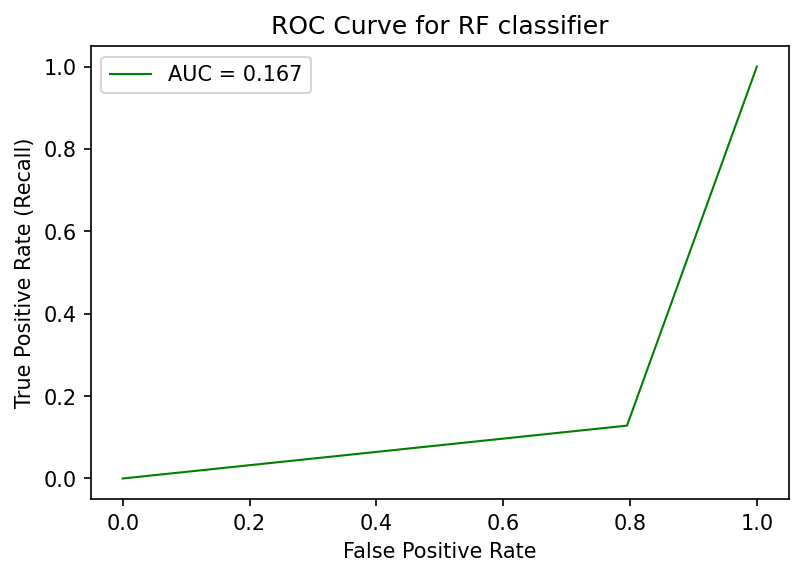

In [75]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_pred_balanced, pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

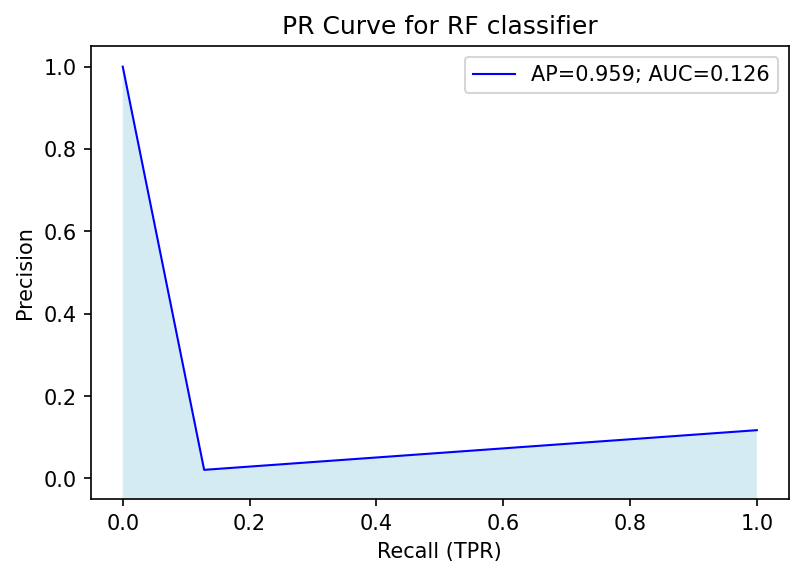

In [76]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test_balanced, y_pred_balanced, pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test_balanced, y_pred_balanced)
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [77]:
from imblearn.ensemble import EasyEnsembleClassifier

In [78]:
X_ee = df_pump_features
y_ee = df_pump_target.values.ravel()

In [79]:
X_train_ee, X_test_ee, y_train_ee, y_test_ee = train_test_split(
    X_ee, 
    y_ee, 
    test_size=0.2, 
    random_state=42
)

In [80]:
model_easy_ensemble = EasyEnsembleClassifier(n_estimators=10)
model_easy_ensemble.fit(X_train_ee, y_train_ee)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model_easy_ensemble, X_test_ee, y_test_ee, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.854


In [81]:
y_pred_ee = model_easy_ensemble.predict(X_test_ee)
print(classification_report(y_test_ee, y_pred_ee))

              precision    recall  f1-score   support

           0       0.36      0.82      0.50       296
           1       0.97      0.80      0.88      2227

    accuracy                           0.81      2523
   macro avg       0.66      0.81      0.69      2523
weighted avg       0.90      0.81      0.84      2523



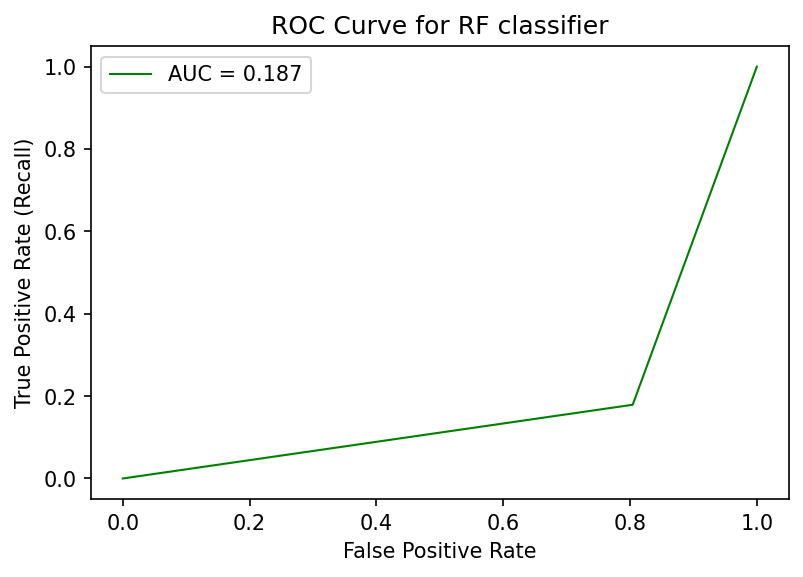

In [82]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test_ee, y_pred_ee, pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

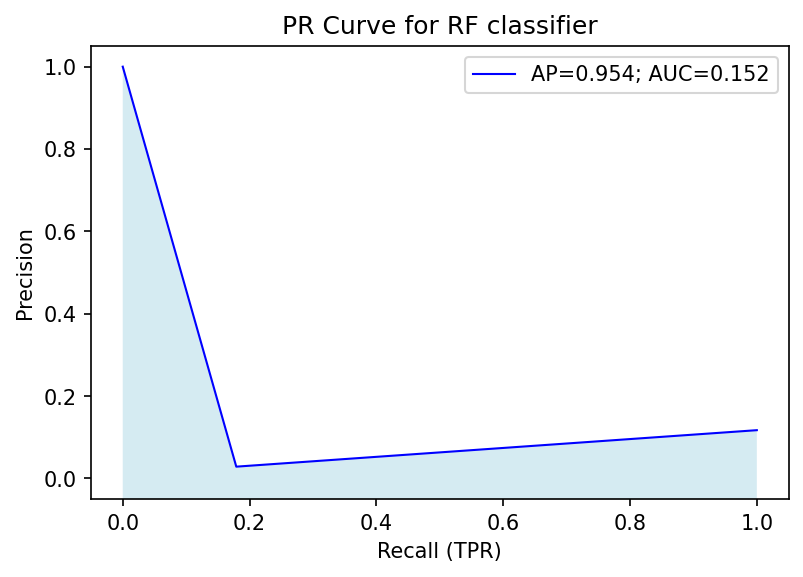

In [83]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test_ee, y_pred_ee, pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test_ee, y_pred_ee)
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()